# ***Hyperspectral Image Classification***

## Contents

- [**1.** Required Libraries](#1-required-libraries)

- [**2.** Dataset Information](#2-dataset-information)
    - [**2.1.** Indian Pines - Info](#21-indian-pines---info)
    - [**2.2.** Pavia University - Info](#22-pavia-university---info)
    - [**2.3.** Salinas - Info](#23-salinas---info)

- [**3.** Data Operations & Pre-processing](#3-data-operations--pre-processing)
    - [**3.1.** Indian Pines - Ops](#31-indian-pines---ops)
    - [**3.2.** Pavia University - Ops](#32-pavia-university---ops)
    - [**3.3.** Salinas - Ops](#33-salinas---ops)
    
- [**4.** Machine Learning Algorithms](#4-machine-learning-algorithms)
    - [**4.1.** Logistic Regression](#41-logistic-regression)
        - [**4.1.1.** Indian Pines - LogReg](#411-indian-pines---logreg)
    - [**4.2.** Linear Discriminant Analysis (LDA)](#42-linear-discriminant-analysis-lda)
    - [**4.3.** Support Vector Classifier (SVC) - Linear](#43-support-vector-classifier-svc---linear)
        - [**4.3.1.** Indian Pines - SVC Linear](#431-indian-pines---svc-linear)
    - [**4.4.** Support Vector Classifier (SVC) - Polynom](#44-support-vector-classifier-svc---polynom)
    - [**4.5.** Support Vector Classifier (SVC) - Radial Basis Function](#45-support-vector-classifier-svc---radial-basis-function)
    - [**4.6.** K-Nearest Neighbors (KNN)](#46-k-nearest-neighbors-knn)
        - [**4.6.1.** Indian Pines - KNN](#461-indian-pines---knn)
    - [**4.7.** Gaussian Naive Bayes (GNB)](#47-gaussian-naive-bayes-gnb)
    - [**4.8.** Decision Tree](#48-decision-tree)
    - [**4.9.** Random Forest](#49-random-forest)
        - [**4.9.1.** Indian Pines - RF](#491-indian-pines---rf)
    - [**4.10.** AdaBoost](#410-adaboost)
    - [**4.11.** CatBoost](#411-catboost)
    - [**4.12.** XGBoost](#412-xgboost)
    - [**4.13.** LightGBM](#413-lightgbm)
        -  [**4.13.1.** Indian Pines - LGBM](#4131-indian-pines---lgbm)
    - [**4.14.** Multi-Layer Perceptron (MLP)](#414-multi-layer-perceptron-mlp)

## **1.** Required Libraries

In [1]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

from sklearn.model_selection import train_test_split
from dataset_loader import get_base_path, load_dataset
from dataset_info import get_dataset_labels, dataset_summary, plot_class_distribution_graph, plot_class_distribution_table, visualize_sample_band, visualize_ground_truth
from preprocess import reshape_features, filter_valid_samples
from models_1_ml import initialize_model, evaluate_model
from result_visualization import plot_confusion_matrix, plot_f1_bar

## **2.** Dataset Information

In [2]:
# configurations
get_base_path()
base_path = ".\\Dataset"
save_path = ".\\Result"

### **2.1.** Indian Pines - Info

In [3]:
# load the indian pines dataset
dataset_ip = "Indian_Pines"
image_ip, ground_truth_ip = load_dataset(dataset_ip)

In [4]:
# print basic class information about the indian pines dataset
label_names_ip = get_dataset_labels(dataset_ip)
print("Class Summary of Indian Pines:")
print("- Class Names:")
for i in range(0, len(label_names_ip)):
    print("\t->", label_names_ip[i])
print("- Ignored Class ID:", label_names_ip.index("Undefined"), "(Undefined)")

Class Summary of Indian Pines:
- Class Names:
	-> Undefined
	-> Alfalfa
	-> Corn-notill
	-> Corn-mintill
	-> Corn
	-> Grass-Pasture
	-> Grass-trees
	-> Grass-pasture-mowed
	-> Hay-windrowed
	-> Oats
	-> Soybean-notill
	-> Soybean-mintill
	-> Soybean-clean
	-> Wheat
	-> Woods
	-> Buildings-grass-trees-drives
	-> Stone-steel-towers
- Ignored Class ID: 0 (Undefined)


In [5]:
# print summary of the indian pines dataset
dataset_summary(image_ip, ground_truth_ip)

Dataset Summary:
- Image Shape: (145, 145, 200) (Width x Height x Bands)
- Image Data Type: uint16
- Number of Spectral Bands: 200
- Image Value Range: 955 - 9604

Ground Truth (Labels) Summary:
- Labels Shape: (145, 145) (Width x Height)
- Labels Data Type: uint8
- Number of Classes: 16
- Class Distribution: {1: 46, 2: 1428, 3: 830, 4: 237, 5: 483, 6: 730, 7: 28, 8: 478, 9: 20, 10: 972, 11: 2455, 12: 593, 13: 205, 14: 1265, 15: 386, 16: 93}



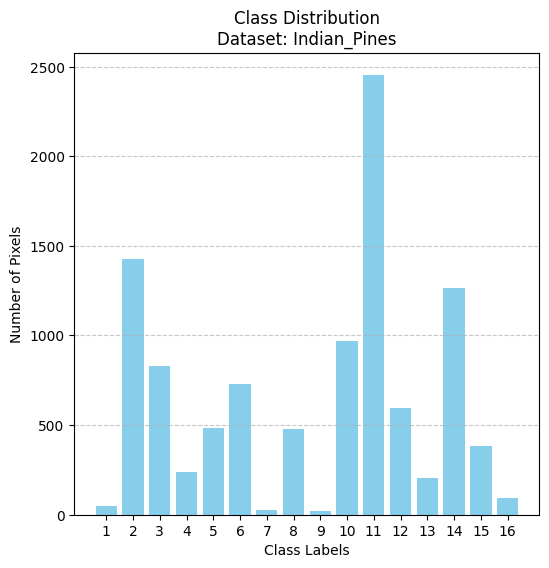

In [6]:
# class distribution graph of the indian pines dataset
plot_class_distribution_graph(ground_truth_ip, dataset_ip, save_path)

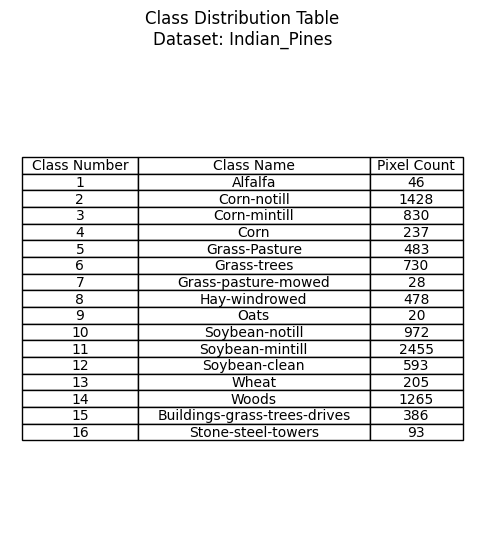

In [7]:
# class distribution table of the indian pines dataset
plot_class_distribution_table(ground_truth_ip[ground_truth_ip > 0], label_names_ip, dataset_ip, save_path)

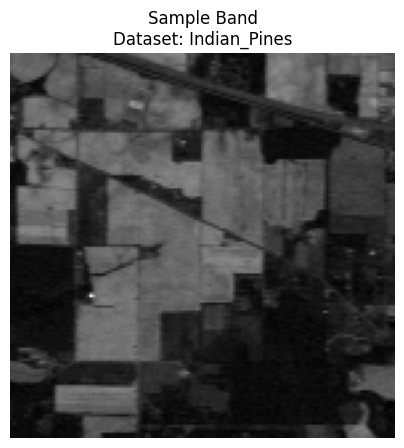

In [8]:
# sample band of the indian pines dataset
visualize_sample_band(image_ip, 185, dataset_ip, save_path)

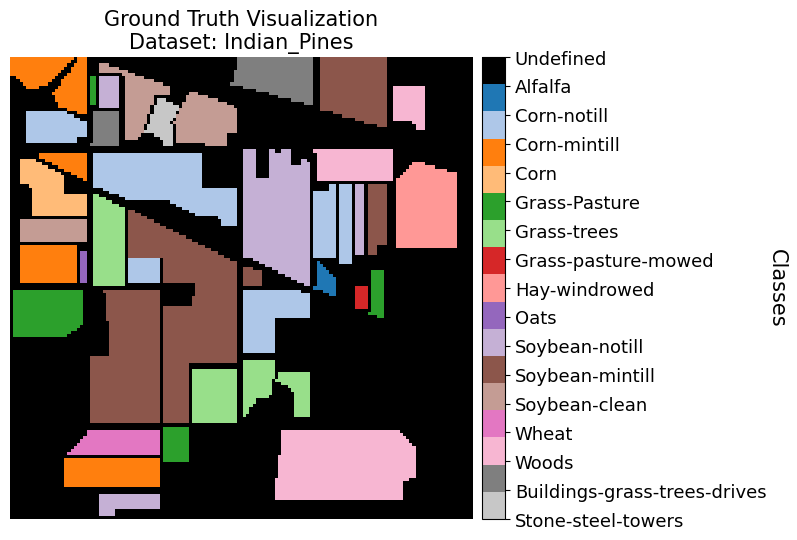

In [9]:
# ground truth visualization of the indian pines dataset
visualize_ground_truth(ground_truth_ip, label_names_ip, dataset_ip, save_path)

### **2.2.** Pavia University - Info

In [10]:
# load the pavia university dataset
dataset_pu = "Pavia_University"
image_pu, ground_truth_pu = load_dataset(dataset_pu)

In [11]:
# print basic class information about the pavia university dataset
label_names_pu = get_dataset_labels(dataset_pu)
print("Class Summary of Pavia University:")
print("- Class Names:")
for i in range(0, len(label_names_pu)):
    print("\t->", label_names_pu[i])
print("- Ignored Class ID:", label_names_pu.index("Undefined"), "(Undefined)")

Class Summary of Pavia University:
- Class Names:
	-> Undefined
	-> Asphalt
	-> Meadows
	-> Gravel
	-> Trees
	-> Painted metal sheets
	-> Bare Soil
	-> Bitumen
	-> Self-Blocking Bricks
	-> Shadows
- Ignored Class ID: 0 (Undefined)


In [12]:
# print summary of the pavia university dataset
dataset_summary(image_pu, ground_truth_pu)

Dataset Summary:
- Image Shape: (610, 340, 103) (Width x Height x Bands)
- Image Data Type: uint16
- Number of Spectral Bands: 103
- Image Value Range: 0 - 8000

Ground Truth (Labels) Summary:
- Labels Shape: (610, 340) (Width x Height)
- Labels Data Type: uint8
- Number of Classes: 9
- Class Distribution: {1: 6631, 2: 18649, 3: 2099, 4: 3064, 5: 1345, 6: 5029, 7: 1330, 8: 3682, 9: 947}



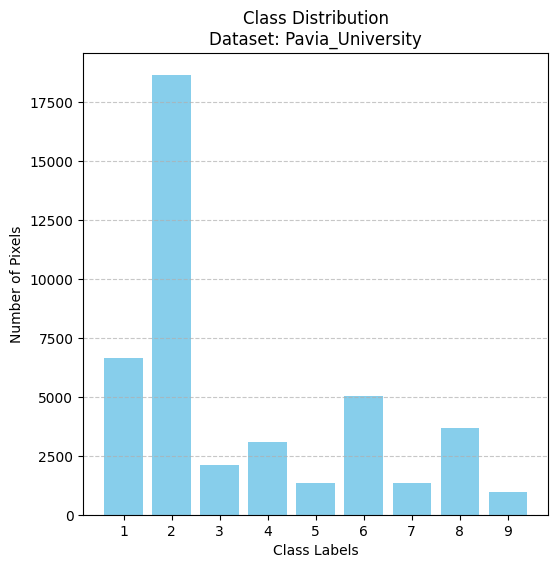

In [13]:
# class distribution graph of the pavia university dataset
plot_class_distribution_graph(ground_truth_pu, dataset_pu, save_path)

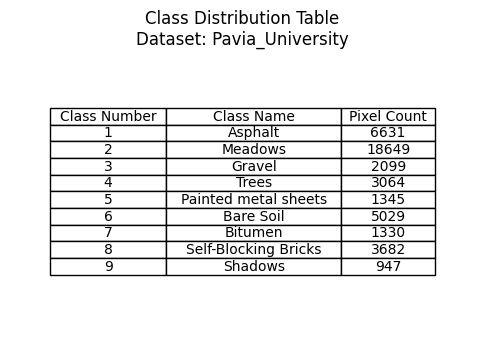

In [14]:
# class distribution table of the pavia university dataset
plot_class_distribution_table(ground_truth_pu[ground_truth_pu > 0], label_names_pu, dataset_pu, save_path)

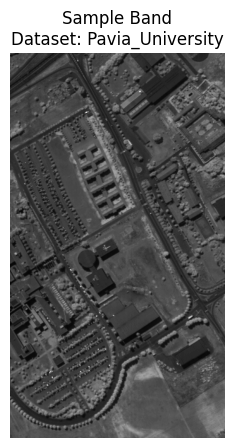

In [15]:
# sample band of the pavia university dataset
visualize_sample_band(image_pu, 100, dataset_pu, save_path)

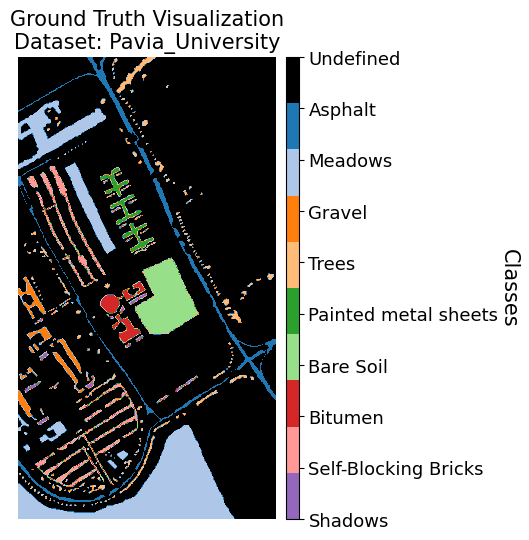

In [16]:
# ground truth visualization of the pavia university dataset
visualize_ground_truth(ground_truth_pu, label_names_pu, dataset_pu, save_path)

### **2.3.** Salinas - Info

In [17]:
# load the salinas dataset
dataset_sn = "Salinas"
image_sn, ground_truth_sn = load_dataset(dataset_sn)

In [18]:
# print basic class information about the salinas dataset
label_names_sn = get_dataset_labels(dataset_sn)
print("Class Summary of Salinas:")
print("- Class Names:")
for i in range(0, len(label_names_sn)):
    print("\t->", label_names_sn[i])
print("- Ignored Class ID:", label_names_sn.index("Undefined"), "(Undefined)")

Class Summary of Salinas:
- Class Names:
	-> Undefined
	-> Broccoli_green_weeds_1
	-> Broccoli_green_weeds_2
	-> Fallow
	-> Fallow_rough_plow
	-> Fallow_smooth
	-> Stubble
	-> Celery
	-> Grapes_untrained
	-> Soil_vineyard_develop
	-> Corn_senesced_green_weeds
	-> Lettuce_romaine_4wk
	-> Lettuce_romaine_5wk
	-> Lettuce_romaine_6wk
	-> Lettuce_romaine_7wk
	-> Vineyard_untrained
	-> Vineyard_vertical_trellis
- Ignored Class ID: 0 (Undefined)


In [19]:
# print summary of the salinas dataset
dataset_summary(image_sn, ground_truth_sn)

Dataset Summary:
- Image Shape: (512, 217, 204) (Width x Height x Bands)
- Image Data Type: int16
- Number of Spectral Bands: 204
- Image Value Range: -11 - 9207

Ground Truth (Labels) Summary:
- Labels Shape: (512, 217) (Width x Height)
- Labels Data Type: uint8
- Number of Classes: 16
- Class Distribution: {1: 2009, 2: 3726, 3: 1976, 4: 1394, 5: 2678, 6: 3959, 7: 3579, 8: 11271, 9: 6203, 10: 3278, 11: 1068, 12: 1927, 13: 916, 14: 1070, 15: 7268, 16: 1807}



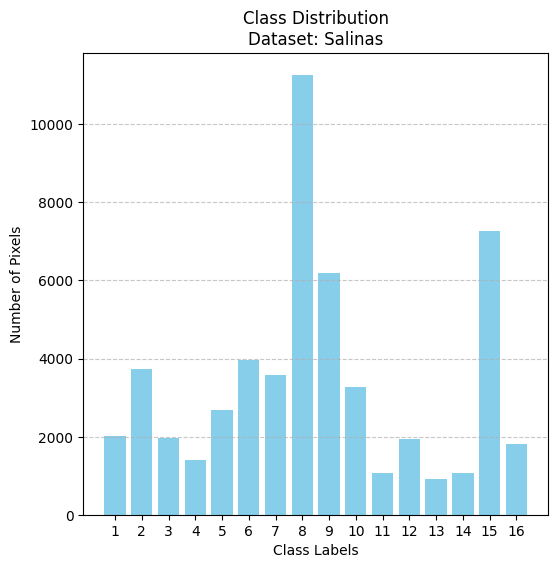

In [20]:
# class distribution graph of the salinas dataset
plot_class_distribution_graph(ground_truth_sn, dataset_sn, save_path)

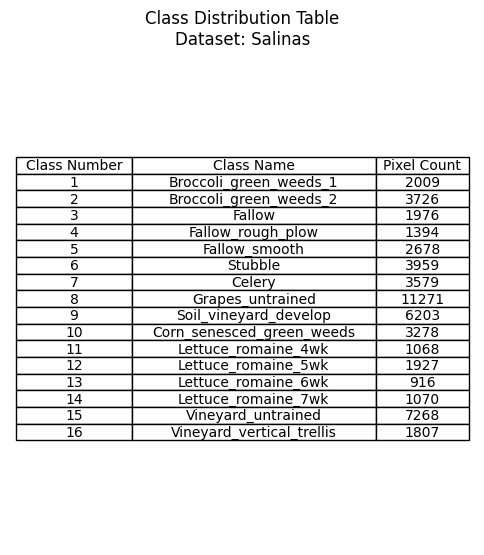

In [21]:
# class distribution table of the salinas dataset
plot_class_distribution_table(ground_truth_sn[ground_truth_sn > 0], label_names_sn, dataset_sn, save_path)

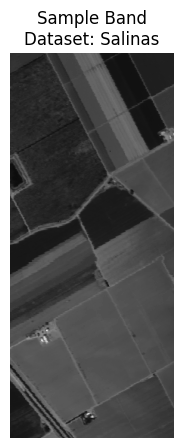

In [22]:
# sample band of the salinas dataset
visualize_sample_band(image_sn, 30, dataset_sn, save_path)

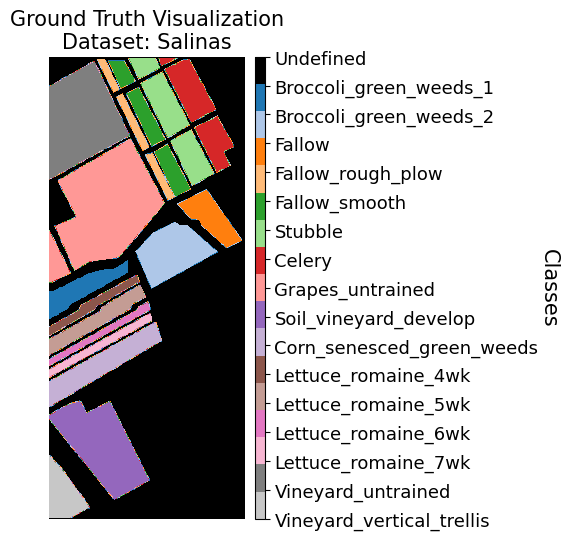

In [23]:
# ground truth visualization of the salinas dataset
visualize_ground_truth(ground_truth_sn, label_names_sn, dataset_sn, save_path)

## **3.** Data Operations & Pre-processing

### **3.1.** Indian Pines - Ops

In [24]:
# reshape the data into 2D format (each pixel as a row, each band as a column)
X_ip, y_ip = reshape_features(image_ip, ground_truth_ip)
print(f"X Shape: {X_ip.shape}")
print(f"y Shape: {y_ip.shape}")

X Shape: (21025, 200)
y Shape: (21025,)


In [25]:
# remove background pixels (class 0)
X_ip, y_ip = filter_valid_samples(X_ip, y_ip)

In [26]:
# split the data into training and testing sets
X_train_ip, X_test_ip, y_train_ip, y_test_ip = train_test_split(
    X_ip, y_ip, test_size=0.3, random_state=42, stratify=y_ip
)

### **3.2.** Pavia University - Ops

In [27]:
# reshape the data into 2D format (each pixel as a row, each band as a column)
X_pu, y_pu = reshape_features(image_pu, ground_truth_pu)
print(f"X Shape: {X_pu.shape}")
print(f"y Shape: {y_pu.shape}")

X Shape: (207400, 103)
y Shape: (207400,)


In [28]:
# remove background pixels (class 0)
X_pu, y_pu = filter_valid_samples(X_pu, y_pu)

In [29]:
# split the data into training and testing sets
X_train_pu, X_test_pu, y_train_pu, y_test_pu = train_test_split(
    X_pu, y_pu, test_size=0.3, random_state=42, stratify=y_pu
)

### **3.3.** Salinas - Ops

In [30]:
# reshape the data into 2D format (each pixel as a row, each band as a column)
X_sn, y_sn = reshape_features(image_sn, ground_truth_sn)
print(f"X Shape: {X_sn.shape}")
print(f"y Shape: {y_sn.shape}")

X Shape: (111104, 204)
y Shape: (111104,)


In [31]:
# remove background pixels (class 0)
X_sn, y_sn = filter_valid_samples(X_sn, y_sn)

In [32]:
# split the data into training and testing sets
X_train_sn, X_test_sn, y_train_sn, y_test_sn = train_test_split(
    X_sn, y_sn, test_size=0.3, random_state=42, stratify=y_sn
)

## **4.** Machine Learning Algorithms

### **4.1.** Logistic Regression

In [33]:
# model initialization
model_logreg = initialize_model(
    "LogisticRegression",
    C=10.0,
    penalty="l1",
    solver="saga",
    max_iter=3000,
    tol=1e-3,
    multi_class="multinomial",
    random_state=42
)

#### **4.1.1.** Indian Pines - LogReg

In [34]:
# train the model
model_logreg.fit(X_train_ip, y_train_ip)

LogisticRegression(C=10.0, max_iter=3000, multi_class='multinomial',
                   penalty='l1', random_state=42, solver='saga', tol=0.001)

In [35]:
# make predictions
y_pred_ip_logreg = model_logreg.predict(X_test_ip)

In [36]:
# evaluate the model
results_ip_logreg, report_ip_logreg = evaluate_model(y_test_ip, y_pred_ip_logreg)
print("- General Evaluation Results:")
for metric, value in results_ip_logreg.items():
    if value is not None:
        print(f"  - {metric}: {value:.4f}")

- Classification Report:

               precision    recall  f1-score   support

           1       0.88      0.50      0.64        14
           2       0.76      0.79      0.77       428
           3       0.72      0.55      0.63       249
           4       0.71      0.42      0.53        71
           5       0.93      0.88      0.91       145
           6       0.93      0.98      0.95       219
           7       0.86      0.75      0.80         8
           8       0.93      0.99      0.96       143
           9       1.00      0.33      0.50         6
          10       0.68      0.66      0.67       292
          11       0.69      0.82      0.75       737
          12       0.66      0.43      0.52       178
          13       0.91      1.00      0.95        61
          14       0.92      0.97      0.94       380
          15       0.83      0.61      0.70       116
          16       1.00      0.96      0.98        28

    accuracy                           0.78      3075

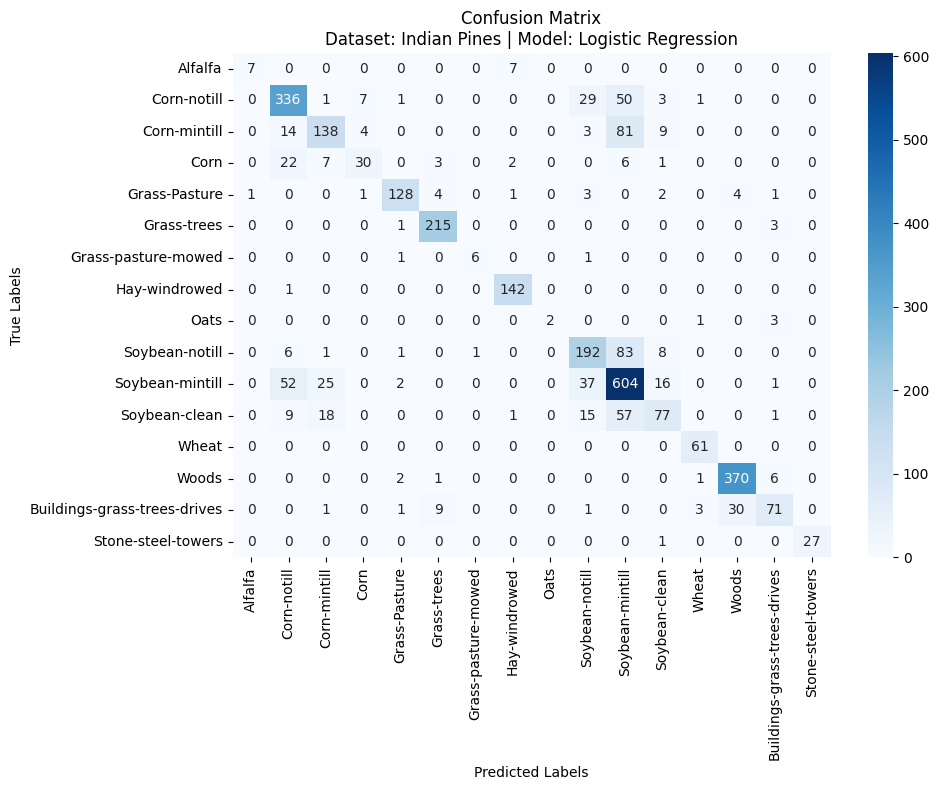

In [37]:
# visualize confusion matrix
plot_confusion_matrix(y_test_ip, y_pred_ip_logreg, label_names_ip[1:], "Indian Pines", "Logistic Regression", save_path)

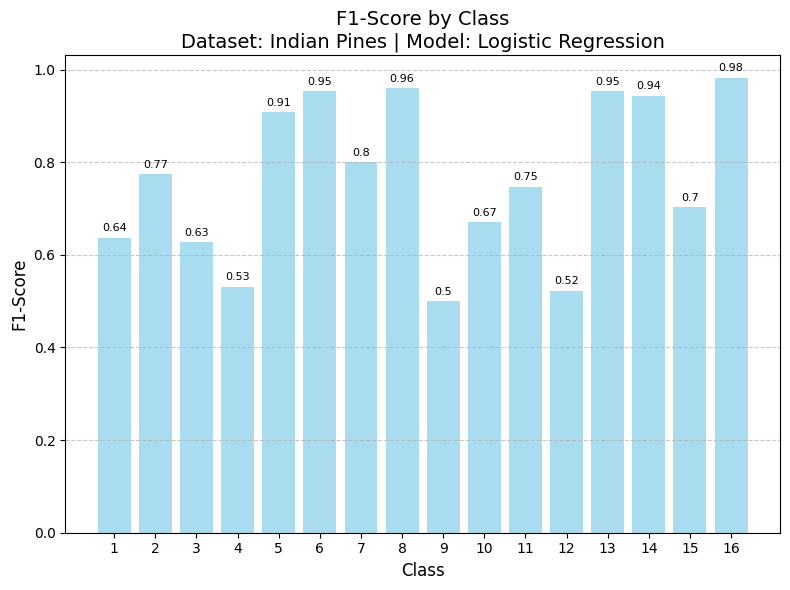

In [38]:
# visualize f1-score bars for all classes
plot_f1_bar(report_ip_logreg, "Indian Pines", "Logistic Regression", save_path)

### **4.2.** Linear Discriminant Analysis (LDA)


In [39]:
# model initialization
model_lda = initialize_model(
    "LDA",
    
)

### **4.3.** Support Vector Classifier (SVC) - Linear

In [40]:
# model initialization
model_svc_lin = initialize_model(
    "SVC-Linear",
    C=10.0,
    max_iter=10000,
    tol=1e-10,
    class_weight="balanced",
    random_state=42
)

#### **4.3.1.** Indian Pines - SVC Linear

In [41]:
# train the model
model_svc_lin.fit(X_train_ip, y_train_ip)

SVC(C=10.0, class_weight='balanced', kernel='linear', max_iter=10000,
    random_state=42, tol=1e-10)

In [42]:
# make predictions
y_pred_ip_svc_lin = model_svc_lin.predict(X_test_ip)

In [43]:
# evaluate the model
results_ip_svc_lin, report_ip_svc_lin = evaluate_model(y_test_ip, y_pred_ip_svc_lin)
print("\n- SVC Linear Evaluation Results:")
for metric, value in results_ip_svc_lin.items():
    if value is not None:
        print(f"  - {metric}: {value:.4f}")

- Classification Report:

               precision    recall  f1-score   support

           1       0.76      0.93      0.84        14
           2       0.62      0.77      0.68       428
           3       0.52      0.69      0.59       249
           4       0.65      0.66      0.66        71
           5       0.90      0.96      0.93       145
           6       0.96      0.97      0.97       219
           7       0.88      0.88      0.88         8
           8       0.99      0.99      0.99       143
           9       0.80      0.67      0.73         6
          10       0.72      0.44      0.55       292
          11       0.68      0.61      0.64       737
          12       0.68      0.69      0.68       178
          13       0.95      1.00      0.98        61
          14       0.95      0.92      0.94       380
          15       0.74      0.75      0.74       116
          16       1.00      0.93      0.96        28

    accuracy                           0.74      3075

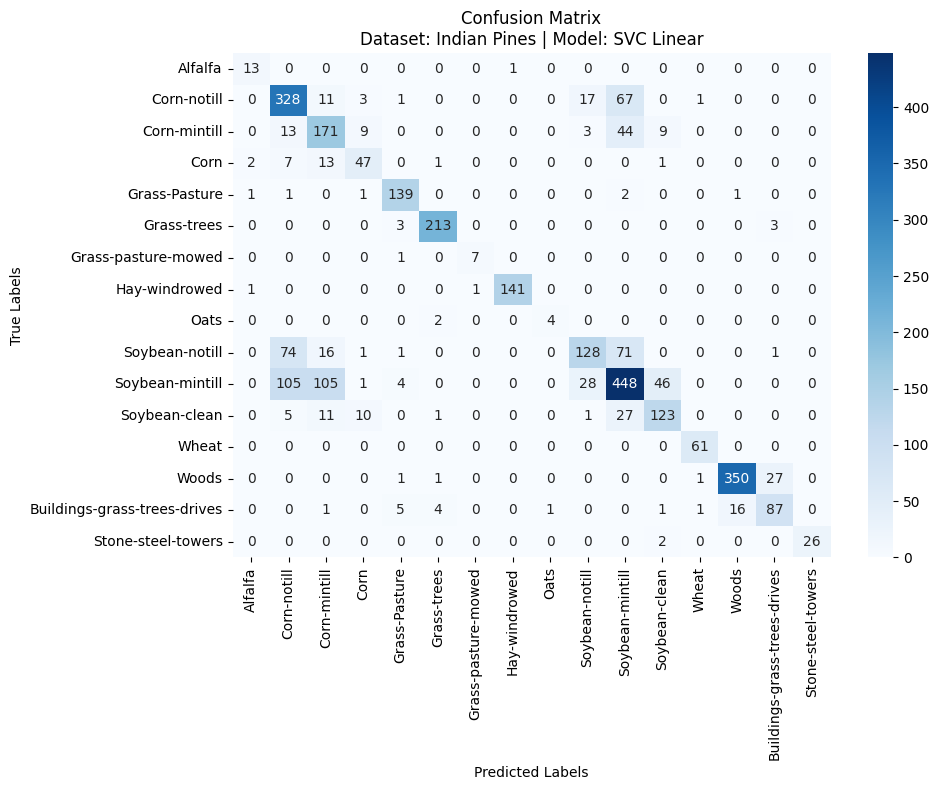

In [44]:
# visualize confusion matrix
plot_confusion_matrix(y_test_ip, y_pred_ip_svc_lin, label_names_ip[1:], "Indian Pines", "SVC Linear", save_path)

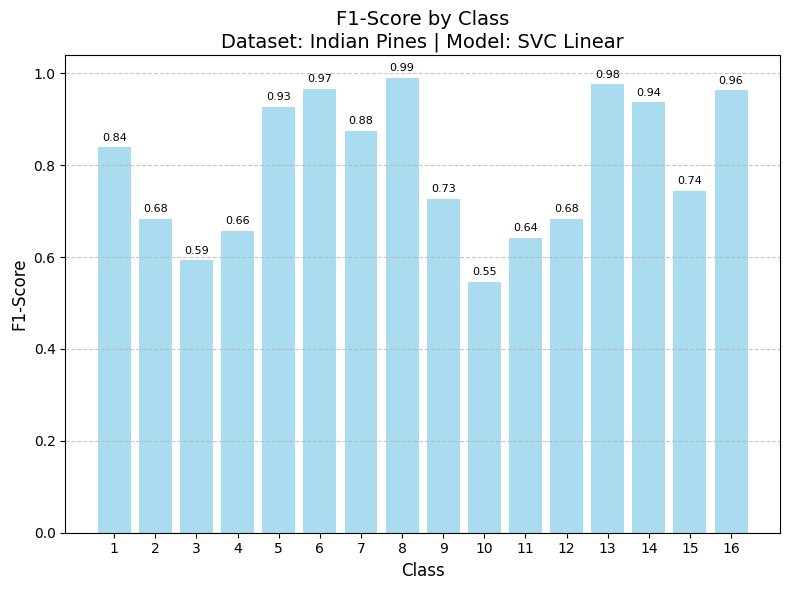

In [45]:
# visualize f1-score bars for all classes
plot_f1_bar(report_ip_svc_lin, "Indian Pines", "SVC Linear", save_path)

### **4.4.** Support Vector Classifier (SVC) - Polynom

In [46]:
# model initialization
model_svc_ply = initialize_model(
    "SVC-Poly",
    
)

### **4.5.** Support Vector Classifier (SVC) - Radial Basis Function

In [47]:
# model initialization
model_svc_rbf = initialize_model(
    "SVC-RBF",
    
)

### **4.6.** K-Nearest Neighbors (KNN)

In [48]:
# initialize the model
model_knn = initialize_model(
    "KNN",
    n_neighbors=4,
    weights="distance",
    algorithm="auto"
)

#### **4.6.1.** Indian Pines - KNN

In [49]:
# train the model
model_knn.fit(X_train_ip, y_train_ip)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [50]:
# make predictions
y_pred_ip_knn = model_knn.predict(X_test_ip)

In [51]:
# evaluate the model
results_ip_knn, report_ip_knn = evaluate_model(y_test_ip, y_pred_ip_knn)
print("\n- knn evaluation results:")
for metric, value in results_ip_knn.items():
    if value is not None:
        print(f"  - {metric}: {value:.4f}")

- Classification Report:

               precision    recall  f1-score   support

           1       0.86      0.43      0.57        14
           2       0.68      0.67      0.67       428
           3       0.71      0.56      0.63       249
           4       0.61      0.52      0.56        71
           5       0.90      0.89      0.89       145
           6       0.85      0.99      0.91       219
           7       0.88      0.88      0.88         8
           8       0.94      0.99      0.97       143
           9       0.80      0.67      0.73         6
          10       0.66      0.82      0.73       292
          11       0.77      0.81      0.79       737
          12       0.67      0.54      0.60       178
          13       0.92      0.98      0.95        61
          14       0.93      0.93      0.93       380
          15       0.70      0.49      0.58       116
          16       1.00      0.96      0.98        28

    accuracy                           0.78      3075

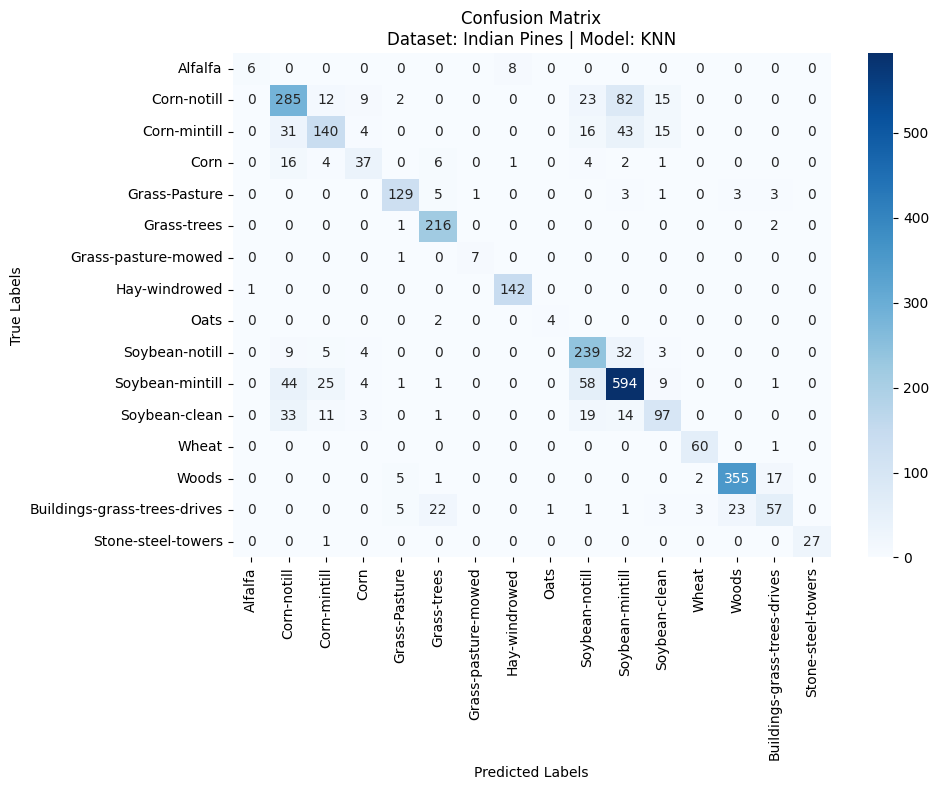

In [52]:
# visualize confusion matrix
plot_confusion_matrix(y_test_ip, y_pred_ip_knn, label_names_ip[1:], "Indian Pines", "KNN", save_path)

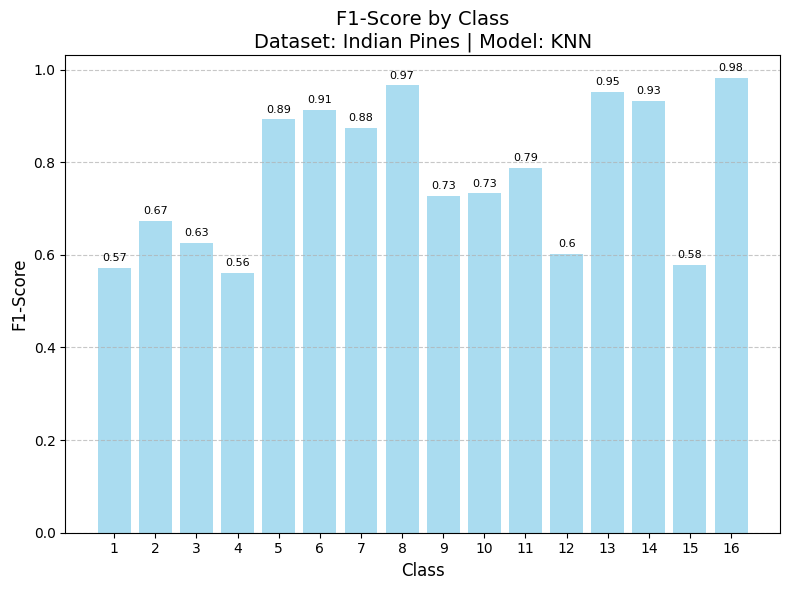

In [53]:
# visualize f1-score bars for all classes
plot_f1_bar(report_ip_knn, "Indian Pines", "KNN", save_path)

### **4.7.** Gaussian Naive Bayes (GNB)

In [54]:
# model initialization
model_gnb = initialize_model(
    "GNB",
    
)

### **4.8.** Decision Tree

In [55]:
# model initialization
model_dt = initialize_model(
    "DecisionTree",
    
)

### **4.9.** Random Forest

In [56]:
# model initialization
model_rf = initialize_model(
    "RandomForest",
    n_estimators=250,
    max_depth=30,
    min_samples_split=3,
    min_samples_leaf=3,
    max_features="sqrt",
    class_weight="balanced",
    random_state=42
)

#### **4.9.1.** Indian Pines - RF

In [57]:
# train the model
model_rf.fit(X_train_ip, y_train_ip)

RandomForestClassifier(class_weight='balanced', max_depth=30,
                       min_samples_leaf=3, min_samples_split=3,
                       n_estimators=250, random_state=42)

In [58]:
# make predictions
y_pred_ip_rf = model_rf.predict(X_test_ip)

In [59]:
# evaluate the model
results_ip_rf, report_ip_rf = evaluate_model(y_test_ip, y_pred_ip_rf)
print("\n- Random Forest Evaluation Results:")
for metric, value in results_ip_rf.items():
    if value is not None:
        print(f"  - {metric}: {value:.4f}")

- Classification Report:

               precision    recall  f1-score   support

           1       1.00      0.79      0.88        14
           2       0.87      0.80      0.83       428
           3       0.88      0.73      0.80       249
           4       0.64      0.72      0.68        71
           5       0.93      0.89      0.91       145
           6       0.89      0.98      0.93       219
           7       0.88      0.88      0.88         8
           8       0.93      0.99      0.96       143
           9       1.00      0.83      0.91         6
          10       0.81      0.89      0.85       292
          11       0.87      0.88      0.88       737
          12       0.74      0.80      0.77       178
          13       0.93      0.92      0.93        61
          14       0.92      0.97      0.94       380
          15       0.77      0.59      0.67       116
          16       0.93      0.96      0.95        28

    accuracy                           0.86      3075

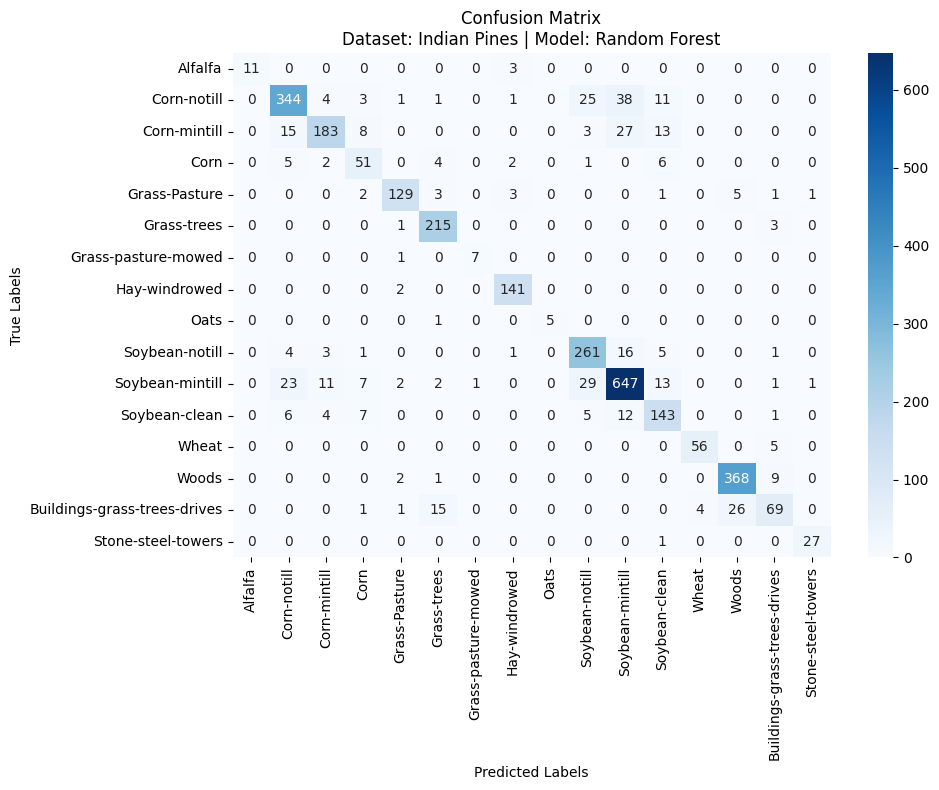

In [60]:
# visualize confusion matrix
plot_confusion_matrix(y_test_ip, y_pred_ip_rf, label_names_ip[1:], "Indian Pines", "Random Forest", save_path)

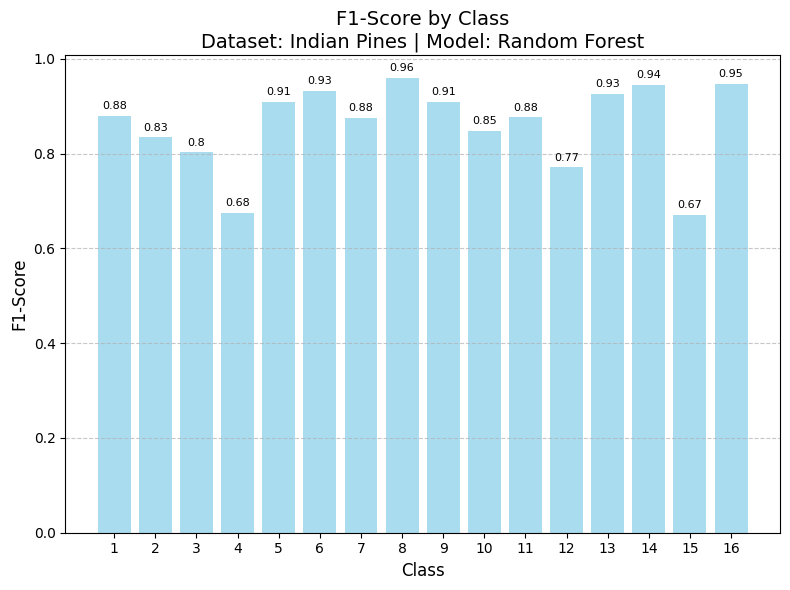

In [61]:
# visualize f1-score bars for all classes
plot_f1_bar(report_ip_rf, "Indian Pines", "Random Forest", save_path)

### **4.10.** AdaBoost

In [62]:
# model initialization
model_ada = initialize_model(
    "AdaBoost",
    
)

### **4.11.** CatBoost

In [63]:
# model initialization
model_cat = initialize_model(
    "CatBoost",
    
)

### **4.12.** XGBoost

In [64]:
# model initialization
model_xg = initialize_model(
    "XGBoost",
    
)

### **4.13.** LightGBM

In [65]:
# model initialization
model_lgbm = initialize_model(
    "LightGBM",
    n_estimators=500,
    learning_rate=0.05,
    max_depth=10,
    min_data_in_leaf=20,
    boosting_type='gbdt',
    class_weight='balanced',
    feature_fraction=0.8,
    bagging_fraction=0.8,
    random_state=42,
    verbose=-1
)

#### **4.13.1.** Indian Pines - LGBM

In [66]:
# train the model
model_lgbm.fit(X_train_ip, y_train_ip)

LGBMClassifier(bagging_fraction=0.8, class_weight='balanced',
               feature_fraction=0.8, learning_rate=0.05, max_depth=10,
               min_data_in_leaf=20, n_estimators=500, random_state=42,
               verbose=-1)

In [67]:
# make predictions
y_pred_ip_lgbm = model_lgbm.predict(X_test_ip)

In [68]:
# evaluate the model
results_ip_lgbm, report_ip_lgbm = evaluate_model(y_test_ip, y_pred_ip_lgbm)
print("\n- LightGBM Evaluation Results:")
for metric, value in results_ip_lgbm.items():
    if value is not None:
        print(f"  - {metric}: {value:.4f}")

- Classification Report:

               precision    recall  f1-score   support

           1       1.00      0.79      0.88        14
           2       0.91      0.89      0.90       428
           3       0.93      0.86      0.90       249
           4       0.84      0.79      0.81        71
           5       0.95      0.95      0.95       145
           6       0.96      1.00      0.98       219
           7       1.00      0.88      0.93         8
           8       0.97      0.99      0.98       143
           9       1.00      0.83      0.91         6
          10       0.87      0.90      0.88       292
          11       0.91      0.93      0.92       737
          12       0.86      0.91      0.89       178
          13       0.98      0.97      0.98        61
          14       0.95      0.98      0.96       380
          15       0.89      0.77      0.82       116
          16       0.96      0.86      0.91        28

    accuracy                           0.92      3075

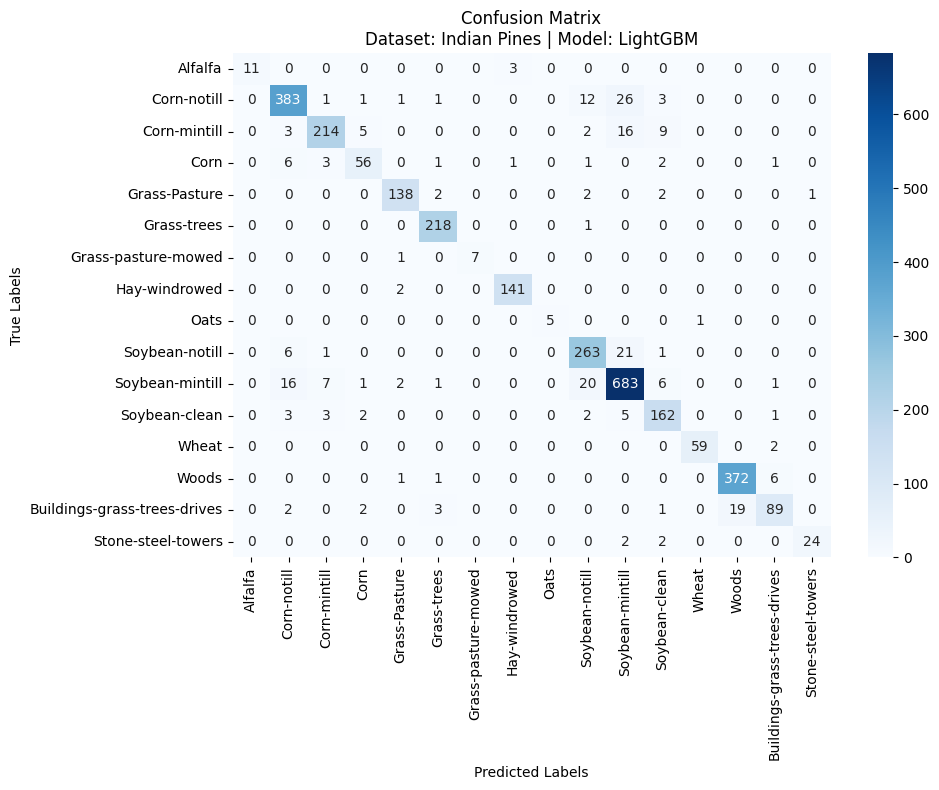

In [69]:
# visualize confusion matrix
plot_confusion_matrix(y_test_ip, y_pred_ip_lgbm, label_names_ip[1:], "Indian Pines", "LightGBM", save_path)

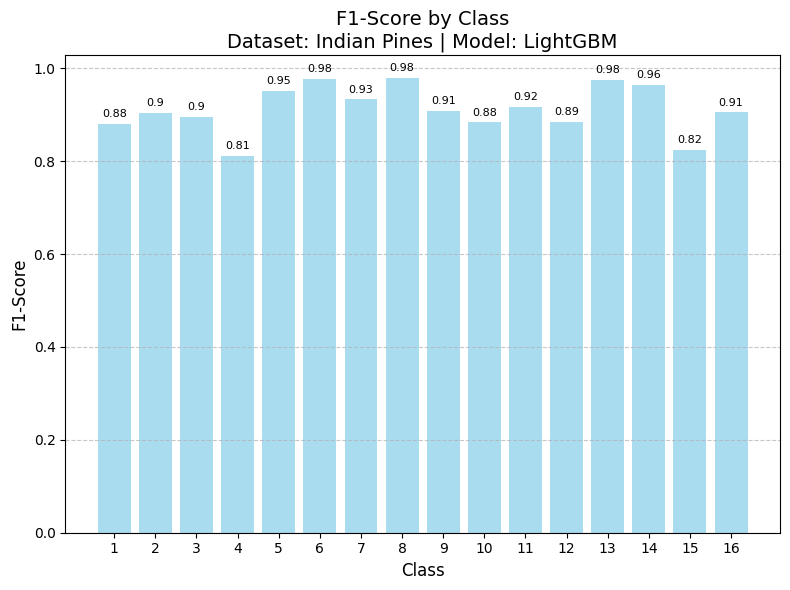

In [70]:
# visualize f1-score bars for all classes
plot_f1_bar(report_ip_lgbm, "Indian Pines", "LightGBM", save_path)

### **4.14.** Multi-Layer Perceptron (MLP)

In [71]:
# model initialization
model_mlp = initialize_model(
    "MLP",
    
)